**Lab Artificial Intelligence  (U19967)**

**Part 1 - Implementing a  Multi Layer Perceptron**



**What is a Multi-Layer Perceptron (MLP)?**

A Multi-Layer Perceptron (MLP) is a class of feedforward neural networks consisting of an input layer, one or more hidden layers, and an output layer.
Each neuron (node) computes a weighted sum of its inputs and passes it through an activation function.

In Scikit-learn, we use:

In [ ]:
from sklearn.neural_network import MLPClassifier # for classification

from sklearn.neural_network import MLPRegressor # for regression


**1. Dataset Overview**

**Goal:** Predict whether a tumor is malignant (cancerous) or benign (non-cancerous).

**Samples:** 569

**Features:** 30 numeric features derived from cell nuclei in digitized images (e.g., radius, texture, smoothness).

**Target:** Binary (0 = malignant, 1 = benign).

**Step 1: Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


**Step 2: Load and Inspect the Dataset**

In [7]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature names:", data.feature_names[:5], "...")
print("Classes:", data.target_names)
print(f"Dataset shape: {X.shape}, Labels: {y.shape}")

# Convert to a DataFrame for easy viewing
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y  # Optionally include the target column

# Display the first 5 rows
df.head()

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
Classes: ['malignant' 'benign']
Dataset shape: (569, 30), Labels: (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Step 3: Train-Test Split**

We’ll reserve 30% of data for testing.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Step 4: Feature Scaling**

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 5: Define and Train the MLP Classifier**

We’ll use two hidden layers with ReLU activation.

In [30]:
mlp = MLPClassifier(
    hidden_layer_sizes=(15,10),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(15, 10), max_iter=1000, random_state=42)

**Key Components**
| Component                     | Description                                              |
| ----------------------------- | -------------------------------------------------------- |
| **Hidden layers:** `(15, 10)` | Two hidden layers with 15 and 10 neurons respectively    |
| **Activation:** `'relu'`      | Applies non-linearity to learn complex relationships     |
| **Solver:** `'adam'`          | Adaptive gradient-based optimizer (robust and efficient) |
| **max_iter:** `1000`          | Number of training epochs                                |
| **StandardScaler:**           | Normalizes each feature to zero mean and unit variance   |


**Step 6: Evaluate Model Performance**

In [31]:
y_pred = mlp.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Confusion Matrix:
[[ 62   2]
 [  4 103]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        64
      benign       0.98      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



**Expected accuracy:** typically around **97–99% **on this dataset.

**Step 7: Visualize Confusion Matrix**

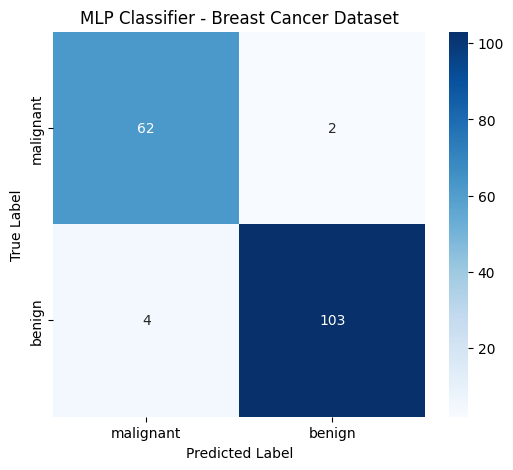

In [32]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("MLP Classifier - Breast Cancer Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Step 8: Visualize Training Loss Curve

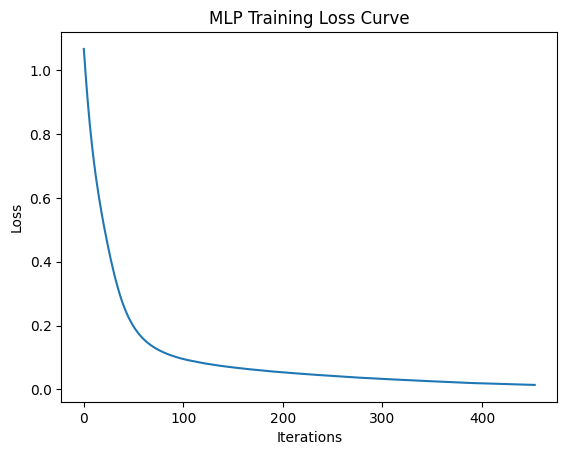

In [33]:
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


The curve should decrease smoothly and flatten out near convergence.

***Can you modify the MLP parameters so that the model performs poorly?***


